<a href="https://colab.research.google.com/github/bossmanemma/portfolio/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("SucideData.csv")

df.head(2)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent


In [2]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k pop  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   HDI for year       8364 non-null   float64
 9    gdp_for_year      27820 non-null  object 
 10  gdp_per_capita     27820 non-null  int64  
 11  generation         27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [4]:
df.isnull().sum()


,0
country,0
year,0
sex,0
age,0
suicides_no,0
population,0
suicides/100k pop,0
country-year,0
HDI for year,19456
gdp_for_year,0


In [5]:
df[df["HDI for year"].notnull()][["country", "year", "HDI for year"]]


,country,year,HDI for year
72,Albania,1995,0.619
73,Albania,1995,0.619
74,Albania,1995,0.619
75,Albania,1995,0.619
76,Albania,1995,0.619
...,...,...,...
27815,Uzbekistan,2014,0.675
27816,Uzbekistan,2014,0.675
27817,Uzbekistan,2014,0.675
27818,Uzbekistan,2014,0.675


In [6]:
# removing hdi column
df.drop(["HDI for year"], axis=1)

df.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


###setting the correct data type for each column

In [7]:
# changing year column to date
df["year"] = pd.to_datetime(df["year"], format="%Y").dt.year
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int32  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k pop  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   HDI for year       8364 non-null   float64
 9    gdp_for_year      27820 non-null  object 
 10  gdp_per_capita     27820 non-null  int64  
 11  generation         27820 non-null  object 
dtypes: float64(2), int32(1), int64(3), object(6)
memory usage: 2.4+ MB


In [8]:
#editing age to age group and removing years from the result
df = df.rename(columns={"age": "age group"})
df["age group"] = df["age group"].str.replace(" years", "", regex=True)

df.head()


,country,year,sex,age group,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [9]:
# changing suicides/100k pop to sucides per 100k pop
df = df.rename(columns={"suicides/100k pop": "suicides per 100k pop"})
df.head()

,country,year,sex,age group,suicides_no,population,suicides per 100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [10]:
#droping country-year
df = df.drop(["country-year"], axis=1)
df.head()

,country,year,sex,age group,suicides_no,population,suicides per 100k pop,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34,9,274300,3.28,NaN,"2,156,624,900",796,Boomers


In [11]:
#checking for duplicate row
df.duplicated().sum()

np.int64(0)

###Exploratory Data Analysis (EDA):


In [12]:
# Summary Statistics:
#Compute descriptive statistics (mean, median, min, max) for
#numerical columns.
df.describe()


,year,suicides_no,population,suicides per 100k pop,HDI for year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [13]:
# Grouping by year and calculating mean of  suicide per 100k pop
suicide_rate_yearly = df.groupby("year")["suicides per 100k pop"].mean()

suicide_rate_yearly.sort_values(ascending=False)



,suicides per 100k pop
year,
1995,15.662671
1996,15.305422
1997,14.954361
1998,14.926920
1999,14.532038
1994,14.073272
2000,13.941328
1993,13.833705
2002,13.786550


In [14]:
suicide_rate_yearly.describe()


,suicides per 100k pop
count,32.000000
mean,12.816324
std,1.380428
min,11.011464
25%,11.588993
50%,12.786180
75%,13.798339
max,15.662671


In [15]:
# Grouping by country and calculate mean of suicide  per 100k pop
suicide_rate_country = df.groupby("country")["suicides per 100k pop"].mean()

suicide_rate_country.sort_values(ascending=False)

,suicides per 100k pop
country,
Lithuania,40.415573
Sri Lanka,35.295152
Russian Federation,34.892377
Hungary,32.761516
Belarus,31.075913
...,...
Oman,0.736111
Antigua and Barbuda,0.552901
Jamaica,0.521765


In [16]:
suicide_rate_country.describe()

,suicides per 100k pop
count,101.000000
mean,12.026201
std,9.333470
min,0.000000
25%,4.617083
50%,10.469328
75%,18.439000
max,40.415573


#Temporal Trends:


####Examine changes in suicide rates over the years.

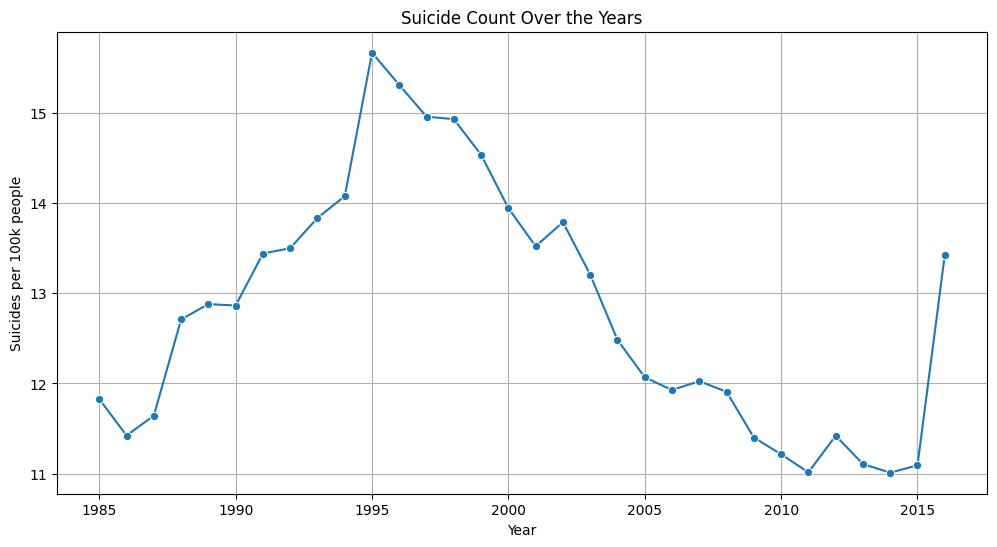

In [17]:
# Group by year and calculate the average suicide rate
suicide_rate_over_years = df.groupby("year")["suicides per 100k pop"].mean()

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=suicide_rate_over_years.index, y=suicide_rate_over_years.values, marker="o")
plt.title("Suicide Count Over the Years")
plt.xlabel("Year")
plt.ylabel("Suicides per 100k people")
plt.grid(True)
plt.show()

####Analyze gender-wise suicide trends.

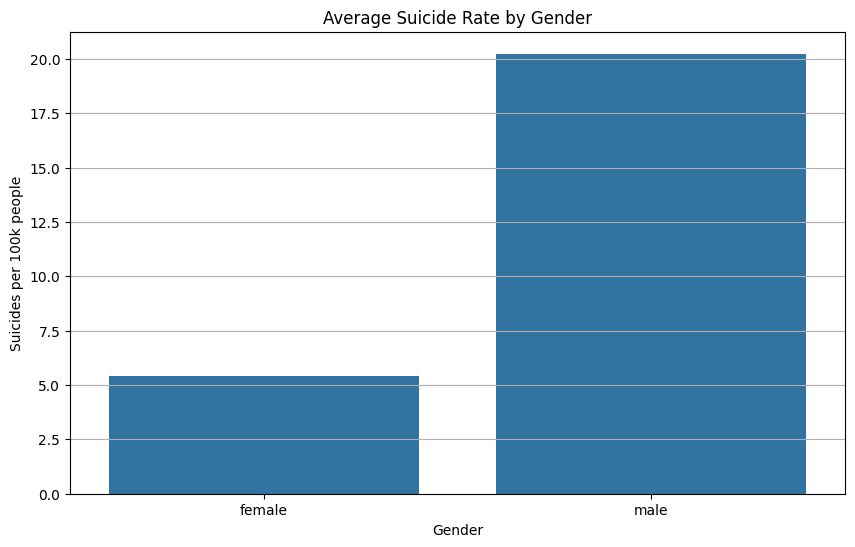

In [18]:
# Group by year and gender, then compute the mean suicide rate
gender_trends = df.groupby(["sex"])["suicides per 100k pop"].mean()

# Plot gender-wise trends over the years
plt.figure(figsize=(10, 6))
sns.barplot(x=gender_trends.index, y=gender_trends.values, errorbar=None)
plt.title("Average Suicide Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Suicides per 100k people")
plt.grid(axis="y")
plt.show()


#Economic and Social Factors:

 #### Compare suicide rates among different generations.

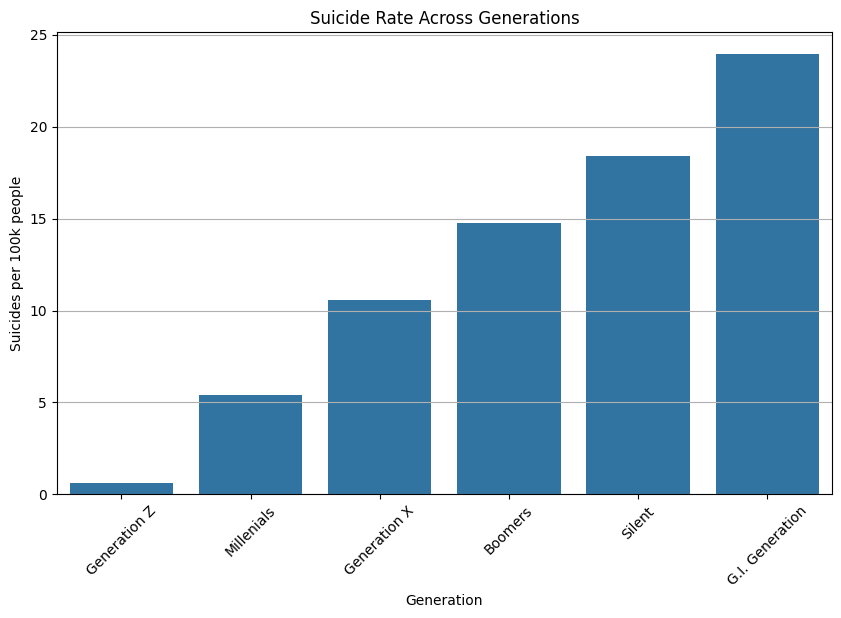

In [19]:
generation_suicide = df.groupby('generation')['suicides per 100k pop'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=generation_suicide.index, y=generation_suicide.values,errorbar=None )
plt.title("Suicide Rate Across Generations")
plt.xlabel("Generation")
plt.ylabel("Suicides per 100k people")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


####Investigate the correlation between GDP per capita and suicide rates.


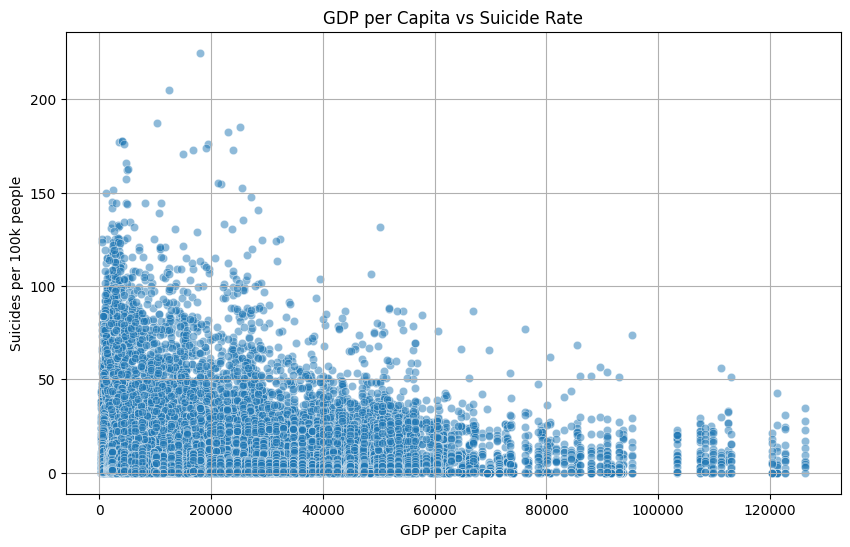

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot( x=df["gdp_per_capita"], y=df["suicides per 100k pop"], alpha=0.5)
plt.title("GDP per Capita vs Suicide Rate")
plt.xlabel("GDP per Capita")
plt.ylabel("Suicides per 100k people")
plt.grid(True)
plt.show()

In [21]:
correlation = df[["gdp_per_capita", "suicides per 100k pop"]].corr()
correlation
# the corrolation is 0.001785 meaning no strong relationship as it is closer to 0

,gdp_per_capita,suicides per 100k pop
gdp_per_capita,1.000000,0.001785
suicides per 100k pop,0.001785,1.000000


#others

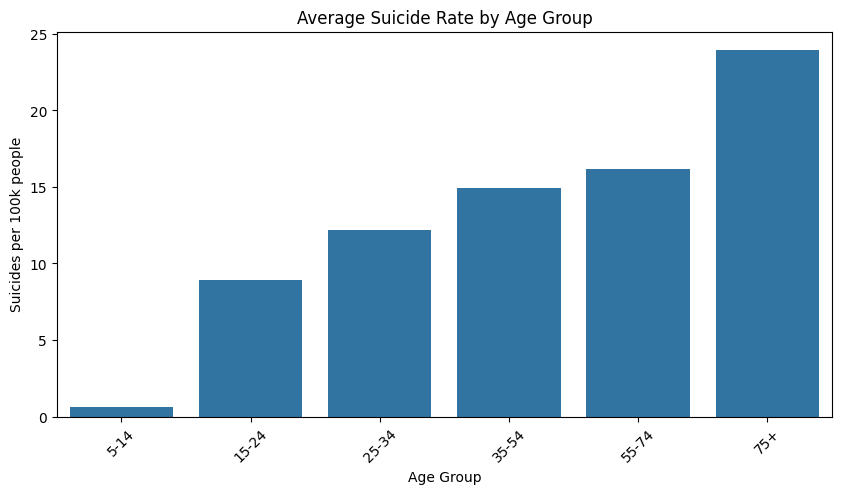

In [22]:
# Suicide rate by age group
plt.figure(figsize=(10, 5))
sns.barplot( x=df['age group'], y=df['suicides per 100k pop'], estimator='mean', order=[
    '5-14', '15-24', '25-34', '35-54', '55-74', '75+'],errorbar=None)
plt.title('Average Suicide Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Suicides per 100k people')
plt.xticks(rotation=45)
plt.show()

In [23]:
# Identify top 10 countries with highest suicide rates
top_countries = df.groupby('country')['suicides per 100k pop'].mean().nlargest(10)

top_countries

,suicides per 100k pop
country,
Lithuania,40.415573
Sri Lanka,35.295152
Russian Federation,34.892377
Hungary,32.761516
Belarus,31.075913
Kazakhstan,30.511282
Latvia,29.259325
Slovenia,27.827857
Estonia,27.276905


In [24]:
# Identify bottom 10 countries with lowest suicide rates
bottom_countries = df.groupby('country')['suicides per 100k pop'].mean().nsmallest(10)
bottom_countries

,suicides per 100k pop
country,
Dominica,0.000000
Saint Kitts and Nevis,0.000000
Jamaica,0.521765
Antigua and Barbuda,0.552901
Oman,0.736111
South Africa,0.964542
Kuwait,1.186433
Bahamas,1.247391
United Arab Emirates,1.317917


In [25]:
# Identify the most affected generation
generation_suicide = df.groupby('generation')['suicides per 100k pop'].mean().sort_values()
generation_suicide

,suicides per 100k pop
generation,
Generation Z,0.642299
Millenials,5.383597
Generation X,10.556874
Boomers,14.742094
Silent,18.418848
G.I. Generation,23.946378


In [26]:
# Identify the most affected age group
age_group_suicide = df.groupby('age group')['suicides per 100k pop'].mean().sort_values()
age_group_suicide

,suicides per 100k pop
age group,
5-14,0.620041
15-24,8.947154
25-34,12.186885
35-54,14.947441
55-74,16.155579
75+,23.955409
